## Project Overview and Structure

This notebook shows the process of features extraction for the phishing email detection utilizing AI-Powered (GPT) tools in this project.

In [ ]:
# The Structure of This Notebook

"""

├── Section 0: Import Library and Environment Set Up
│   ├── Install Package                  <- Install ydata-profiling package.
│   ├── Python Library                   <- Import Pyhton Libraries.
│   ├── Random Seed                      <- Set up the value of random seed.
│   └── Check cuda                       <- Check availability of cuda.
│
├── Section 1: Import Dataset
│   ├── Import Dataset                  <- Import the dataset from the above url.
│
├── Section 2: Explore Data and Construct Feature Engineering
│   ├── Section 2.1: Text Feature Engineering
│   ├── Section 2.2: URL-Related Feature Engineering
│   ├── Section 2.3: Social Engineering
│   ├── Section 2.4: Other Feature Engineering
│   ├── Section 2.5: Final Feature Engineering
│   ├── Section 2.6 Others Methods
│
├── Section 3: Visualization (T-SNE technique)

"""

'\n\n├── Section 0: Import Library and Environment Set Up\n│   ├── Install Package                  <- Install ydata-profiling package.\n│   ├── Python Library                   <- Import Pyhton Libraries.\n│   ├── Random Seed                      <- Set up the value of random seed.\n│   └── Check cuda                       <- Check availability of cuda.\n│\n├── Section 1: Import Dataset\n│   ├── Import Dataset 1                 <- Import the 1st dataset from the above url.\n│   ├── Import Dataset 2                 <- Import the 2nd dataset from the above url.\n│   ├── Import Dataset 3                 <- Import the 3rd dataset from the above url.\n│   ├── Import Dataset 4                 <- Import the 4th dataset from the above url.\n│   ├── Import Dataset 5                 <- Import the 5th dataset from the above url.\n│   ├── Import Dataset 6                 <- Import the 6th dataset from the above url.\n│\n├── Section 2: Create Total Dataset (Combined Dataset) and Explore this Datas

## Section 0: Import Library and Environment Set Up

In [ ]:
# Install Package
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
# Basic Python Library
import random
import math
import sys
import time
import re
from collections import Counter

# Numpy, Pandas, Tensor and tqdm
import numpy as np
import tensorflow as tf
import torch
from torch import nn
import pandas as pd
import tqdm
from tqdm import tqdm

# plot
import matplotlib.pyplot as plt

# os
import os

# Other Library -- Section 2
import nltk
from sentence_transformers import SentenceTransformer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from urllib.parse import urlparse

# Other Library -- Section 3
from sklearn.manifold import TSNE

In [ ]:
# Random Seed
seed_0 = 6
seed_1 = 8
seed_2 = 66
seed_3 = 88

In [ ]:
# Check cuda
torch.cuda.is_available()

True

## Section 1: Import Dataset

In [ ]:
# Import Dataset 1

# data path
data_path = '/content/cleaned_imbalance_dataset.csv'

# read a csv file
dataset = pd.read_csv(data_path)

# display
dataset

,subject,body,label
0,Re: [Python-3000] [Python-Dev] Reminder: last ...,"On 01:55 am, hoauf@python.org wrote:\n>On Thu,...",0
1,terminated employees ' benefits,"happy new year all ,\r\ni have been with enron...",0
2,"9/11, war in Iraq threaten Disney parks",URL: http://boingboing.net/#85531557\nDate: No...,0
3,"If you want a decent watch, get a replica appr...",\nQualitative watches at Replica Classics \n\n...,1
4,re : tds project,"you might hear of this , so i thought i better...",0
...,...,...,...
39995,caiso notification - tswg conference call,please call in @ 1330 pacific . call in number...,0
39996,[UAI] Ph.D Positions in Bioinformatics at Joha...,Ph.D Positions in Bioinformatics\n\nTwo PhD po...,0
39997,happy holidays !,with the holiday season and a new year upon us...,0
39998,Re: [opensuse] Screen Capture,"Chris Arnold wrote:\n> On 10.3, how do i get a...",0


## Section 2: Explore Data and Construct Feature Engineering

In [ ]:
dataset_1 = dataset.copy()

In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  40000 non-null  object
 1   body     40000 non-null  object
 2   label    40000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 937.6+ KB


In [ ]:
print(dataset_1['label'].value_counts())

label
0    32000
1     8000
Name: count, dtype: int64


### Section 2.1: Text Feature Engineering

In [ ]:
# Subject Length
subject_length = dataset_1['subject'].apply(len)
print(subject_length)

0        79
1        31
2        39
3        58
4        16
         ..
39995    41
39996    82
39997    16
39998    29
39999    26
Name: subject, Length: 40000, dtype: int64


In [ ]:
# Body Length
body_length = dataset_1['body'].apply(len)
print(body_length)

0        12215
1         1670
2         1044
3          187
4         6807
         ...  
39995       84
39996     2000
39997      386
39998      591
39999     3168
Name: body, Length: 40000, dtype: int64


In [ ]:
# Special Symbol Number

special_characters = ['!', '@', '#', '$', '%', '^', '&', '*', '(', ')', '-', '=', '+', '?', '>', '<']

def helper_function_13(text):
    return sum(text.count(char) for char in special_characters)

special_symbol_number = dataset_1['body'].apply(helper_function_13)
print(special_symbol_number)

0        184
1          7
2         12
3          0
4         98
        ... 
39995      4
39996     11
39997      0
39998     11
39999    139
Name: body, Length: 40000, dtype: int64


In [ ]:
# Average Word Length
def helper_function_0(data_0):
    words = data_0.split()
    return np.mean([len(word) for word in words])

average_word_length = dataset_1['body'].apply(helper_function_0)
print(average_word_length)

0        4.912420
1        3.804035
2        6.763780
3        6.040000
4        3.713883
           ...   
39995    3.421053
39996    6.238971
39997    4.106667
39998    4.631068
39999    2.855231
Name: body, Length: 40000, dtype: float64


### Section 2.2: URL-Related Feature Engineering

In [ ]:
# URL Average Length
def helper_function_1(text):
    urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    if not urls:
        return 0
    total_length = sum(len(url) for url in urls)
    avg_length = total_length / len(urls)
    return avg_length

dataset
url_average_length = dataset_1['body'].apply(helper_function_1)
print(url_average_length)

0        63.5
1         0.0
2        58.0
3        25.0
4         0.0
         ... 
39995     0.0
39996     0.0
39997     0.0
39998     0.0
39999     0.0
Name: body, Length: 40000, dtype: float64


In [ ]:
# Popular Website

websites_set = set(pd.read_csv('/content/top_website.csv')['google.com'])


def helper_function_10(text):
    urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    for url in urls:
        domain = urlparse(url).netloc
        if domain not in websites_set:
            return False
    return True

is_top_website = dataset_1['body'].apply(helper_function_10)

print(is_top_website)

0        False
1         True
2        False
3        False
4         True
         ...  
39995     True
39996     True
39997     True
39998     True
39999     True
Name: body, Length: 40000, dtype: bool


In [ ]:
# DGA

def helper_function_11(domain):
    if len(domain) > 88:
        return True

    if re.search(r'\d', domain) and re.search(r'[a-zA-Z]', domain):
        return True

    vowels = len(re.findall(r'[aeiou]', domain))
    consonants = len(re.findall(r'[bcdfghjklmnpqrstvwxyz]', domain))

    if consonants == 0:
        return True

    ratio = vowels / consonants
    if ratio < 0.2 or ratio > 0.8:
        return True

    return False


def helper_function_12(text):
    urls = re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    for url in urls:
        domain = urlparse(url).netloc
        if helper_function_11(domain):
            return True
    return False


is_dga = dataset_1['body'].apply(helper_function_12)

print(is_dga)

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Name: body, Length: 40000, dtype: bool


### Section 2.3: Social Engineering

In [ ]:
# Scarcity

scarcity_keywords = [
    "limited time offer", "hurry", "act now", "limited availability", "while supplies last",
    "urgent", "immediately", "now", "last chance", "do not miss out",
    "only a few left", "almost gone", "selling fast", "limited stock",
    "exclusive", "rare opportunity", "final call", "running out", "today only",
    "one-time offer", "first come, first served", "closing soon", "ends soon", "expires soon",
    "limited edition", "few left", "going fast", "once in a lifetime", "exclusive deal",
    "only today", "flash sale", "price drop", "ending soon", "final sale",
    "act quickly", "special offer", "limited supply", "now or never", "one day only",
    "don't delay", "last few remaining", "until stocks last", "available now", "order now",
    "save now", "get it before it's gone", "only for a limited time", "exclusive access",
    "running low", "low stock", "out of stock soon", "final hours", "don't miss your chance",
    "exclusive offer", "rare deal", "only while supplies last", "before it’s too late",
    "limited quantities", "just for today", "while stocks last", "limited-time discount",
    "time-sensitive", "limited-time promotion", "once-in-a-lifetime deal", "immediate action required"
]


def helper_function_2(data):
    data_text = data
    keyword_count = Counter()

    for keyword in scarcity_keywords:
        keyword_count[keyword] = len(re.findall(re.escape(keyword), data_text))

    return sum(keyword_count.values())


num_scarcity = dataset_1['body'].apply(helper_function_2)

print(num_scarcity)

0        6
1        2
2        0
3        0
4        5
        ..
39995    0
39996    1
39997    0
39998    0
39999    3
Name: body, Length: 40000, dtype: int64


In [ ]:
# Authority

authority_keywords = [
    "ceo", "chief executive officer", "cto", "chief technology officer", "cfo", "chief financial officer",
    "coo", "chief operating officer", "cio", "chief information officer", "manager", "director", "supervisor",
    "president", "vice president", "vp", "head of", "administrator", "authority", "executive", "officer",
    "department head", "team leader", "section chief", "superintendent", "boss", "senior", "leader", "principal",
    "command", "compliance", "regulation", "security team", "legal department", "finance department",
    "hr department", "human resources", "it department", "information technology", "administration",
    "urgent", "immediately", "now", "asap", "at once", "this is important", "critical", "official",
    "authorized", "mandatory", "must comply", "order", "demand", "require", "directive", "instruction",
    "protocol", "procedure", "high priority", "top priority", "confidential", "classified", "sensitive",
    "imperative", "vital", "essential", "pressing", "key", "important notice", "security alert", "risk management",
    "audit", "inspection", "enforcement", "investigation", "regulatory", "official communication", "corporate",
    "legal", "compliance office", "security office", "executive office", "board of directors", "chairman",
    "chairperson", "founder", "co-founder", "partner", "associate", "federal", "state", "municipal", "government"
]



def helper_function_3(data):
    data_text = data
    keyword_count = Counter()

    for keyword in authority_keywords:
        keyword_count[keyword] = len(re.findall(re.escape(keyword), data_text))

    return sum(keyword_count.values())



num_authority = dataset_1['body'].apply(helper_function_3)

print(num_authority)

0        74
1         2
2         0
3         0
4        15
         ..
39995     0
39996     4
39997     0
39998     0
39999     3
Name: body, Length: 40000, dtype: int64


In [ ]:
# Urgency

urgency_keywords = [
    "urgent", "immediately", "now", "asap", "at once", "this is important", "critical",
    "immediate action required", "do not delay", "act now", "respond immediately", "urgent response needed",
    "time-sensitive", "instant", "deadline", "final notice", "action required", "respond promptly",
    "last chance", "do not miss out", "ends soon", "expires soon", "limited time", "emergency",
    "security alert", "account locked", "account suspended", "account compromised", "password expired",
    "unauthorized access", "risk", "threat detected", "security breach", "data breach", "fraud alert",
    "identity theft", "compromised", "malware detected", "virus detected", "your account", "your information",
    "your password", "your security", "legal action", "lawsuit", "legal threat", "court notice",
    "prosecution", "fine", "penalty", "violation", "breach of policy", "breach of contract",
    "policy violation", "account verification", "confirm your account", "update your account",
    "verify your identity", "confirm your identity", "update your details", "action needed",
    "required immediately", "final warning", "last warning", "security update", "system alert",
    "system warning", "system message", "important update", "important notice", "important message",
    "immediate attention required", "critical update", "attention required", "verification required",
    "unusual activity", "suspicious activity", "security notice", "alert", "notification"
]



def helper_function_4(data):
    data_text = data
    keyword_count = Counter()

    for keyword in urgency_keywords:
        keyword_count[keyword] = len(re.findall(re.escape(keyword), data_text))

    return sum(keyword_count.values())


num_urgency = dataset_1['body'].apply(helper_function_4)

print(num_urgency)

0        6
1        2
2        0
3        0
4        5
        ..
39995    0
39996    1
39997    0
39998    0
39999    3
Name: body, Length: 40000, dtype: int64


In [ ]:
# Curiosity

curiosity_keywords = [
    "you won't believe", "discover", "secret", "hidden", "unveiled", "exclusive", "shocking",
    "confidential", "unknown", "reveal", "uncovered", "insider", "surprising", "little-known",
    "amazing", "find out", "learn more", "don't miss", "top", "best", "unique", "rare",
    "one-of-a-kind", "special", "limited edition", "only for you", "handpicked", "mystery",
    "curious", "fascinating", "intriguing", "compelling", "eye-opening", "did you know",
    "guess what", "unusual", "extraordinary", "must see", "remarkable", "incredible",
    "unimaginable", "unbelievable", "extraordinary", "fantastic", "startling", "groundbreaking",
    "epic", "mind-blowing", "astonishing", "stunning", "out of this world", "breathtaking",
    "captivating", "exciting", "enticing", "engaging", "irresistible", "tempting",
    "alluring", "appealing", "gripping", "thrilling", "inviting", "enchanting",
    "enrapturing", "bewitching", "seductive", "spellbinding", "mesmerizing", "attractive",
    "exciting offer", "new", "latest", "update", "breaking", "just in", "today only",
    "exclusive offer", "special deal", "limited time", "don't miss out", "hot", "trending",
    "buzz", "viral", "popular", "most wanted", "must have", "everyone is talking about",
    "get yours", "claim your", "take advantage", "secret revealed", "hidden gem", "insider info",
    "exclusive content", "limited access", "sneak peek", "be the first", "get early access",
    "try it now", "check this out", "find out more", "explore", "see for yourself"
]



def helper_function_5(data):
    data_text = data
    keyword_count = Counter()

    for keyword in curiosity_keywords:
        keyword_count[keyword] = len(re.findall(re.escape(keyword), data_text))

    return sum(keyword_count.values())


num_curiosity = dataset_1['body'].apply(helper_function_5)

print(num_curiosity)

0        10
1         4
2         2
3         0
4         2
         ..
39995     0
39996     1
39997     2
39998     1
39999     0
Name: body, Length: 40000, dtype: int64


In [ ]:
# Familiarity

familiarity_keywords = [
    "dear friend", "dear customer", "dear user", "dear valued customer", "dear member",
    "your account", "your bank", "your paypal", "your amazon", "your apple", "your google",
    "account update", "account verification", "confirm your account", "update your account",
    "verify your identity", "confirm your identity", "update your details", "login now",
    "log in", "sign in", "click here", "click the link", "follow this link", "verify now",
    "security update", "security alert", "security notice", "system update", "important update",
    "important notice", "important message", "trusted source", "official", "legitimate",
    "recognized", "approved", "verified", "certified", "authentic", "genuine", "real",
    "known", "reputable", "established", "familiar", "recognized", "well-known", "respected",
    "renowned", "celebrated", "famous", "noted", "popular", "noteworthy", "acclaimed",
    "distinguished", "eminent", "esteemed", "prestigious", "illustrious", "trustworthy",
    "credible", "reliable", "dependable", "safe", "secure", "from your bank", "from your account",
    "from paypal", "from amazon", "from apple", "from google", "from facebook", "from microsoft",
    "urgent account update", "critical account information", "account access", "account activity",
    "security check", "account problem", "unusual activity", "suspicious activity", "login attempt",
    "failed login", "account compromised", "password reset", "password recovery", "change your password",
    "reset your password", "recover your password", "account settings", "account preferences",
    "account management", "billing update", "billing information", "payment details", "payment update",
    "payment confirmation", "order confirmation", "transaction details", "transaction update",
    "payment receipt", "invoice", "subscription update", "renew your subscription", "service update",
    "account security", "account protection", "protect your account", "safe login", "secure login",
    "login securely", "sign in securely", "verify your account", "account alert", "account warning",
    "account notification", "service alert", "service notice", "service message"
]



def helper_function_6(data):
    data_text = data
    keyword_count = Counter()

    for keyword in familiarity_keywords:
        keyword_count[keyword] = len(re.findall(re.escape(keyword), data_text))

    return sum(keyword_count.values())


num_familiarity = dataset_1['body'].apply(helper_function_6)

print(num_familiarity)

0         2
1         1
2         1
3         0
4         0
         ..
39995     0
39996     0
39997     1
39998     0
39999    10
Name: body, Length: 40000, dtype: int64


In [ ]:
# Emotional

emotional_keywords = [
    "act now", "don't miss", "last chance", "urgent", "immediately", "limited time", "final opportunity",
    "hurry", "important", "special offer", "exclusive", "limited availability", "amazing", "incredible",
    "fantastic", "unbelievable", "shocking", "you won't believe", "life-changing", "once in a lifetime",
    "must have", "must see", "best ever", "top", "premium", "extraordinary", "unique", "rare",
    "heartbreaking", "tragic", "unfortunate", "emotional", "heartfelt", "touching", "moving",
    "compassionate", "caring", "sympathetic", "generous", "kind", "thoughtful", "grateful",
    "appreciative", "loving", "affectionate", "sincere", "honest", "trustworthy", "reliable",
    "dependable", "confident", "secure", "safe", "comforting", "reassuring", "relief",
    "calm", "peaceful", "happy", "joyful", "delighted", "excited", "thrilled", "elated",
    "ecstatic", "proud", "satisfied", "content", "pleased", "relieved", "grateful",
    "appreciative", "thankful", "loved", "valued", "respected", "honored", "esteemed",
    "admired", "important", "cherished", "blessed", "fortunate", "lucky", "prosperous",
    "successful", "victorious", "triumphant", "heroic", "brave", "courageous", "fearless",
    "bold", "strong", "powerful", "influential", "determined", "persistent", "resilient",
    "unstoppable", "unstoppable", "invincible", "indomitable", "dedicated", "loyal", "faithful",
    "devoted", "committed", "dependable", "trustworthy", "responsible", "reliable", "safe",
    "secure", "protected", "sheltered", "cared for", "watched over", "guarded", "defended",
    "shielded", "comforted", "soothed", "consoled", "reassured", "uplifted", "inspired",
    "motivated", "encouraged", "empowered", "supported", "strengthened", "fortified",
    "enlightened", "educated", "informed", "aware", "knowledgeable", "wise", "smart",
    "intelligent", "clever", "bright", "sharp", "insightful", "perceptive", "discerning",
    "astute", "shrewd", "prudent", "sensible", "practical", "logical", "rational",
    "reasonable", "thoughtful", "considerate", "mindful", "attentive", "alert", "vigilant",
    "watchful", "observant", "cautious", "careful", "meticulous", "precise", "accurate",
    "exact", "thorough", "detailed", "complete", "comprehensive", "exhaustive", "painstaking",
    "rigorous", "strict", "disciplined", "controlled", "focused", "concentrated", "dedicated",
    "committed", "resolute", "determined", "persistent", "tenacious", "unyielding", "unwavering",
    "steadfast", "loyal", "faithful", "devoted", "supportive", "encouraging", "nurturing",
    "caring", "loving", "affectionate", "warm", "kind", "friendly", "approachable", "sociable",
    "outgoing", "extroverted", "gregarious", "communicative", "talkative", "expressive",
    "articulate", "eloquent", "persuasive", "convincing", "influential", "charismatic",
    "magnetic", "captivating", "engaging", "enthralling", "fascinating", "intriguing",
    "compelling", "riveting", "absorbing", "immersive", "engrossing", "spellbinding",
    "mesmerizing", "hypnotic", "entrancing", "charming", "appealing", "attractive",
    "alluring", "tempting", "seductive", "irresistible", "addictive", "captivating",
    "entrancing", "spellbinding", "mesmerizing", "hypnotic", "alluring", "tempting",
    "seductive", "irresistible", "addictive"
]


def helper_function_7(data):
    data_text = data
    keyword_count = Counter()

    for keyword in emotional_keywords:
        keyword_count[keyword] = len(re.findall(re.escape(keyword), data_text))

    return sum(keyword_count.values())


num_emotional = dataset_1['body'].apply(helper_function_7)

print(num_emotional)

0        17
1         2
2         1
3         0
4         7
         ..
39995     0
39996     2
39997     2
39998     1
39999     0
Name: body, Length: 40000, dtype: int64


In [ ]:
# Sensitive

sensitive_keywords = [
    "provide your", "send your", "update your", "confirm your", "verify your", "enter your",
    "personal information", "account details", "login details", "credentials", "password", "PIN",
    "security question", "SSN", "social security number", "credit card number", "debit card number",
    "bank account number", "routing number", "financial information", "billing address", "home address",
    "phone number", "email address", "mother's maiden name", "date of birth", "driver's license number",
    "passport number", "id number", "tax id", "taxpayer id", "national id", "government id",
    "identification number", "medical records", "health information", "insurance number",
    "policy number", "insurance details", "contact information", "user ID", "username",
    "access code", "security code", "auth code", "authentication code", "verification code",
    "OTP", "one-time password", "security token", "encryption key", "decryption key",
    "private key", "digital certificate", "biometric data", "fingerprint", "facial recognition",
    "voice recognition", "retina scan", "iris scan", "genetic information", "DNA", "background check",
    "employment history", "education history", "criminal record", "payroll information",
    "salary details", "income information", "investment details", "tax return", "W-2", "1099",
    "transaction history", "purchase history", "order details", "shipment details", "tracking number",
    "driver's license", "passport", "identity verification", "document upload", "file upload",
    "account recovery", "password reset", "change password", "reset password", "recover account",
    "unlock account", "account access", "account recovery", "login attempt", "failed login",
    "account compromised", "secure your account", "protect your account", "account security",
    "security alert", "security notice", "important security update", "system update",
    "important update", "account verification", "service update", "validate your", "authenticate your"
]


def helper_function_8(data):
    data_text = data
    keyword_count = Counter()

    for keyword in sensitive_keywords:
        keyword_count[keyword] = len(re.findall(re.escape(keyword), data_text))

    return sum(keyword_count.values())


num_sensitive = dataset_1['body'].apply(helper_function_8)

print(num_sensitive)

0        0
1        1
2        0
3        0
4        0
        ..
39995    0
39996    0
39997    0
39998    0
39999    0
Name: body, Length: 40000, dtype: int64


In [ ]:
# Social Proof

social_proof_keywords = [
    "most popular", "best seller", "trending", "most wanted", "top rated", "highly recommended",
    "best choice", "top choice", "customer favorite", "best pick", "best value", "most loved",
    "most bought", "most purchased", "most chosen", "most preferred", "most trusted",
    "best reviewed", "highest rated", "5-star rating", "four-star rating", "top review",
    "high rating", "excellent review", "positive feedback", "positive review",
    "highly rated", "best feedback", "top feedback", "most reviews", "most feedback",
    "customer reviews", "user reviews", "client reviews", "consumer reviews",
    "customer feedback", "user feedback", "client feedback", "consumer feedback",
    "customer rating", "user rating", "client rating", "consumer rating",
    "recommended by", "endorsed by", "approved by", "trusted by", "preferred by",
    "used by", "chosen by", "selected by", "liked by", "loved by", "appreciated by",
    "valued by", "satisfied customers", "happy customers", "loyal customers",
    "frequent customers", "repeat customers", "returning customers", "popular choice",
    "top choice", "common choice", "usual choice", "frequent choice", "everybody's favorite",
    "everyone's favorite", "people's favorite", "many people", "lots of people",
    "thousands of people", "millions of people", "bestselling", "fastest selling",
    "fast selling", "quick selling", "hot item", "hot product", "in demand",
    "high demand", "huge demand", "great demand", "strong demand", "popular demand",
    "trending now", "currently trending", "trending today", "viral", "going viral",
    "currently viral", "buzz", "creating buzz", "gaining buzz", "word of mouth",
    "talk of the town", "talked about", "highly talked about", "much talked about",
    "widely talked about", "most talked about", "buzzing", "creating a buzz",
    "garnering attention", "attracting attention", "gaining attention",
    "catching attention", "attracting interest", "gaining interest", "catching interest",
    "receiving attention", "getting attention", "drawing attention", "drawing interest",
    "high interest", "much interest", "great interest", "popular among",
    "liked among", "loved among", "favored among", "preferred among", "trusted among",
    "approved among", "endorsed among", "recommended among", "popular with",
    "liked with", "loved with", "favored with", "preferred with", "trusted with",
    "approved with", "endorsed with", "recommended with"
]


def helper_function_9(data):
    data_text = data
    keyword_count = Counter()

    for keyword in social_proof_keywords:
        keyword_count[keyword] = len(re.findall(re.escape(keyword), data_text))

    return sum(keyword_count.values())


num_social_proof = dataset_1['body'].apply(helper_function_9)

print(num_social_proof)

0        0
1        0
2        0
3        0
4        0
        ..
39995    0
39996    0
39997    0
39998    0
39999    0
Name: body, Length: 40000, dtype: int64


### Section 2.4: Other Feature Engineering

In [ ]:
# Sentiment Score
nltk.download('vader_lexicon')

helper_model_0 = SentimentIntensityAnalyzer()
sentiment_score = dataset_1['body'].apply(lambda x: helper_model_0.polarity_scores(x)['compound'])
print(sentiment_score)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


0        0.9985
1        0.6883
2        0.0276
3        0.6705
4        0.9986
          ...  
39995    0.3818
39996    0.9826
39997    0.9795
39998   -0.3919
39999    0.9876
Name: body, Length: 40000, dtype: float64


In [ ]:
# Entropy

def helper_function_6(data):
    data_text = data
    data_counter = Counter(data_text)
    total_length = len(data_text)
    prob = [i / total_length for i in data_counter.values()]
    result = -sum(p * np.log2(p) for p in prob)
    return result

subject_entropy = dataset_1['subject'].apply(helper_function_6)
body_entropy = dataset_1['body'].apply(helper_function_6)

print(subject_entropy)
print(body_entropy)

0        4.681566
1        3.755446
2        4.028491
3        3.883635
4        3.327820
           ...   
39995    3.711602
39996    4.445124
39997    3.375000
39998    3.814372
39999    3.530964
Name: subject, Length: 40000, dtype: float64
0        4.632225
1        4.168684
2        4.887202
3        4.425299
4        4.432903
           ...   
39995    4.424040
39996    4.638424
39997    4.164474
39998    4.630694
39999    4.443841
Name: body, Length: 40000, dtype: float64


### Section 2.5: Final Feature Engineering

In [ ]:
new_dataset = pd.DataFrame()

# raw data
new_dataset["subject"] = dataset_1["subject"]
new_dataset["body"] = dataset_1["body"]

# text
new_dataset["subject_length"] = subject_length
new_dataset["body_length"] = body_length
new_dataset["special_symbol_number"] = special_symbol_number
new_dataset["average_word_length"] = average_word_length

# URL-Related
new_dataset["url_average_length"] = url_average_length
new_dataset["is_top_website"] = is_top_website
new_dataset["is_dga"] = is_dga

# NLP
new_dataset["sentiment_score"] = sentiment_score

# Social
new_dataset["num_scarcity"] = num_scarcity
new_dataset["num_authority"] = num_authority
new_dataset["num_urgency"] = num_urgency
new_dataset["num_curiosity"] = num_curiosity
new_dataset["num_familiarity"] = num_familiarity
new_dataset["num_emotional"] = num_emotional
new_dataset["num_sensitive"] = num_sensitive
new_dataset["num_social_proof"] = num_social_proof

# Other
new_dataset["subject_entropy"] = subject_entropy
new_dataset["body_entropy"] = body_entropy

# Label
new_dataset["label"] = dataset_1["label"]

# Display
new_dataset

,subject,body,subject_length,body_length,special_symbol_number,average_word_length,url_average_length,is_top_website,is_dga,sentiment_score,...,num_authority,num_urgency,num_curiosity,num_familiarity,num_emotional,num_sensitive,num_social_proof,subject_entropy,body_entropy,label
0,Re: [Python-3000] [Python-Dev] Reminder: last ...,"On 01:55 am, hoauf@python.org wrote:\n>On Thu,...",79,12215,184,4.912420,63.5,False,False,0.9985,...,74,6,10,2,17,0,0,4.681566,4.632225,0
1,terminated employees ' benefits,"happy new year all ,\r\ni have been with enron...",31,1670,7,3.804035,0.0,True,False,0.6883,...,2,2,4,1,2,1,0,3.755446,4.168684,0
2,"9/11, war in Iraq threaten Disney parks",URL: http://boingboing.net/#85531557\nDate: No...,39,1044,12,6.763780,58.0,False,False,0.0276,...,0,0,2,1,1,0,0,4.028491,4.887202,0
3,"If you want a decent watch, get a replica appr...",\nQualitative watches at Replica Classics \n\n...,58,187,0,6.040000,25.0,False,False,0.6705,...,0,0,0,0,0,0,0,3.883635,4.425299,1
4,re : tds project,"you might hear of this , so i thought i better...",16,6807,98,3.713883,0.0,True,False,0.9986,...,15,5,2,0,7,0,0,3.327820,4.432903,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,caiso notification - tswg conference call,please call in @ 1330 pacific . call in number...,41,84,4,3.421053,0.0,True,False,0.3818,...,0,0,0,0,0,0,0,3.711602,4.424040,0
39996,[UAI] Ph.D Positions in Bioinformatics at Joha...,Ph.D Positions in Bioinformatics\n\nTwo PhD po...,82,2000,11,6.238971,0.0,True,False,0.9826,...,4,1,1,0,2,0,0,4.445124,4.638424,0
39997,happy holidays !,with the holiday season and a new year upon us...,16,386,0,4.106667,0.0,True,False,0.9795,...,0,0,2,1,2,0,0,3.375000,4.164474,0
39998,Re: [opensuse] Screen Capture,"Chris Arnold wrote:\n> On 10.3, how do i get a...",29,591,11,4.631068,0.0,True,False,-0.3919,...,0,0,1,0,1,0,0,3.814372,4.630694,0


In [ ]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   subject                40000 non-null  object 
 1   body                   40000 non-null  object 
 2   subject_length         40000 non-null  int64  
 3   body_length            40000 non-null  int64  
 4   special_symbol_number  40000 non-null  int64  
 5   average_word_length    40000 non-null  float64
 6   url_average_length     40000 non-null  float64
 7   is_top_website         40000 non-null  bool   
 8   is_dga                 40000 non-null  bool   
 9   sentiment_score        40000 non-null  float64
 10  num_scarcity           40000 non-null  int64  
 11  num_authority          40000 non-null  int64  
 12  num_urgency            40000 non-null  int64  
 13  num_curiosity          40000 non-null  int64  
 14  num_familiarity        40000 non-null  int64  
 15  nu

In [ ]:
new_dataset.to_csv('dataset_after_feature_engineering.csv', index=False)

In [ ]:
new_dataset.head()

,subject,body,subject_length,body_length,special_symbol_number,average_word_length,url_average_length,is_top_website,is_dga,sentiment_score,...,num_authority,num_urgency,num_curiosity,num_familiarity,num_emotional,num_sensitive,num_social_proof,subject_entropy,body_entropy,label
0,Re: [Python-3000] [Python-Dev] Reminder: last ...,"On 01:55 am, hoauf@python.org wrote:\n>On Thu,...",79,12215,184,4.912420,63.5,False,False,0.9985,...,74,6,10,2,17,0,0,4.681566,4.632225,0
1,terminated employees ' benefits,"happy new year all ,\r\ni have been with enron...",31,1670,7,3.804035,0.0,True,False,0.6883,...,2,2,4,1,2,1,0,3.755446,4.168684,0
2,"9/11, war in Iraq threaten Disney parks",URL: http://boingboing.net/#85531557\nDate: No...,39,1044,12,6.763780,58.0,False,False,0.0276,...,0,0,2,1,1,0,0,4.028491,4.887202,0
3,"If you want a decent watch, get a replica appr...",\nQualitative watches at Replica Classics \n\n...,58,187,0,6.040000,25.0,False,False,0.6705,...,0,0,0,0,0,0,0,3.883635,4.425299,1
4,re : tds project,"you might hear of this , so i thought i better...",16,6807,98,3.713883,0.0,True,False,0.9986,...,15,5,2,0,7,0,0,3.327820,4.432903,0


### Section 2.6 Others Methods

In [ ]:
# Sentence Transformer
model = SentenceTransformer('paraphrase-MiniLM-L3-v2')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

embedding_subject = model.encode(dataset_1['subject'].tolist(), show_progress_bar=True)
embedding_body = model.encode(dataset_1['body'].tolist(), show_progress_bar=True)

print(embedding_subject.shape)
print(embedding_body.shape)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.04k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/69.6M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1250 [00:00<?, ?it/s]

Batches:   0%|          | 0/1250 [00:00<?, ?it/s]

(40000, 384)
(40000, 384)


In [ ]:
# Regular expression + nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

dataset_2 = dataset_1.copy()

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)         # Remove website links
    text = re.sub(r'[^a-zA-Z\s]', '', text)   # Remove special symbols
    text = text.lower()                       # Transfer to lower case
    return text


def preprocess_text(text):
    text = clean_text(text)                       # Helper function
    tokens = word_tokenize(text)                  # Tokenization
    stop_words = set(stopwords.words('english'))  # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()              # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)


# feature engineering
dataset_2['subject'] = dataset_2['subject'].apply(preprocess_text)
dataset_2['body'] = dataset_2['body'].apply(preprocess_text)


# display
dataset_2

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,subject,body,label
0,python pythondev reminder last alpha next wedn...,hoaufpythonorg wrote thu may pm wrote hi every...,0
1,terminated employee benefit,happy new year enron year made good friend tim...,0
2,war iraq threaten disney park,url httpboingboingnet date supplied disney the...,0
3,want decent watch get replica approach,qualitative watch replica classic want decent ...,1
4,tds project,might hear thought better forward forwarded ma...,0
...,...,...,...
39995,caiso notification tswg conference call,please call pacific call number passcode,0
39996,uai phd position bioinformatics johannes keple...,phd position bioinformatics two phd position b...,0
39997,happy holiday,holiday season new year upon u would like take...,0
39998,opensuse screen capture,chris arnold wrote get screen capture tried ct...,0


In [ ]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_subject = tfidf_vectorizer.fit_transform(dataset_2['subject'])
tfidf_body    = tfidf_vectorizer.fit_transform(dataset_2['body'])

print("The Type of the TF-IDF representation of [subject] column is:", type(tfidf_subject))
print("The Type of the TF-IDF representation of [body] column is:", type(tfidf_body))
print("The Shape of the TF-IDF representation of [subject] column is:", tfidf_subject.shape)
print("The Shape of the TF-IDF representation of [body] column is:", tfidf_body.shape)

The Type of the TF-IDF representation of [subject] column is: <class 'scipy.sparse._csr.csr_matrix'>
The Type of the TF-IDF representation of [body] column is: <class 'scipy.sparse._csr.csr_matrix'>
The Shape of the TF-IDF representation of [subject] column is: (40000, 17357)
The Shape of the TF-IDF representation of [body] column is: (40000, 235407)


In [ ]:
vectorizer_ngram = CountVectorizer(ngram_range=(2, 2))

X_ngram_subject = vectorizer_ngram.fit_transform(dataset_2['subject'])
X_ngram_body    = vectorizer_ngram.fit_transform(dataset_2['body'])

print("The Type of the N-gram (2) representation of [subject] column is:", type(X_ngram_subject))
print("The Type of the N-gram (2) representation of [body] column is:", type(X_ngram_body))
print("The Shape of the N-gram (2) representation of [subject] column is:", X_ngram_subject.shape)
print("The Shape of the N-gram (2) representation of [body] column is:", X_ngram_body.shape)

The Type of the N-gram (2) representation of [subject] column is: <class 'scipy.sparse._csr.csr_matrix'>
The Type of the N-gram (2) representation of [body] column is: <class 'scipy.sparse._csr.csr_matrix'>
The Shape of the N-gram (2) representation of [subject] column is: (40000, 52851)
The Shape of the N-gram (2) representation of [body] column is: (40000, 2368451)


## Section 3: Visualization (T-SNE technique)

### Section 3.1: Method 1

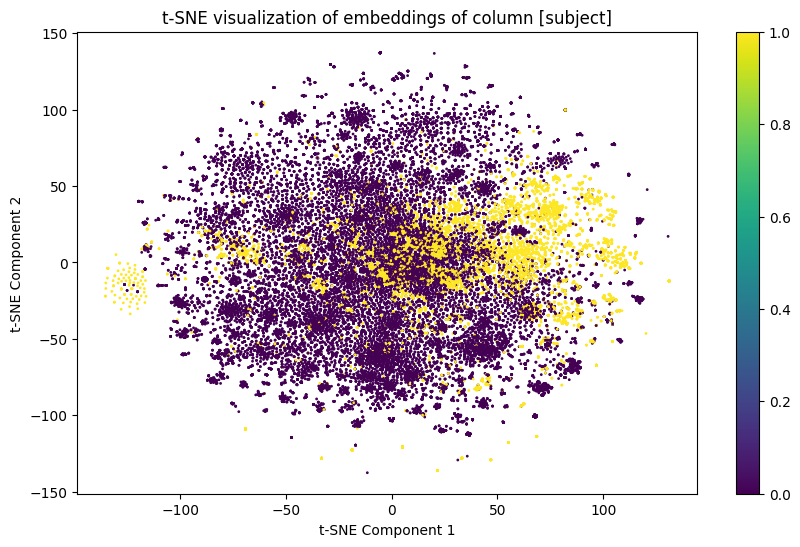

In [ ]:
subject_copy = embedding_subject.copy()
label_copy = dataset_1['label']

# Run t-SNE
tsne_technique = TSNE(n_components=2, random_state=seed_0)
subject_2d = tsne_technique.fit_transform(subject_copy)

plt.figure(figsize=(10, 6))
plt.scatter(subject_2d[:, 0], subject_2d[:, 1], c=label_copy, cmap='viridis', s=1)
plt.title("t-SNE visualization of embeddings of column [subject]")
plt.colorbar()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

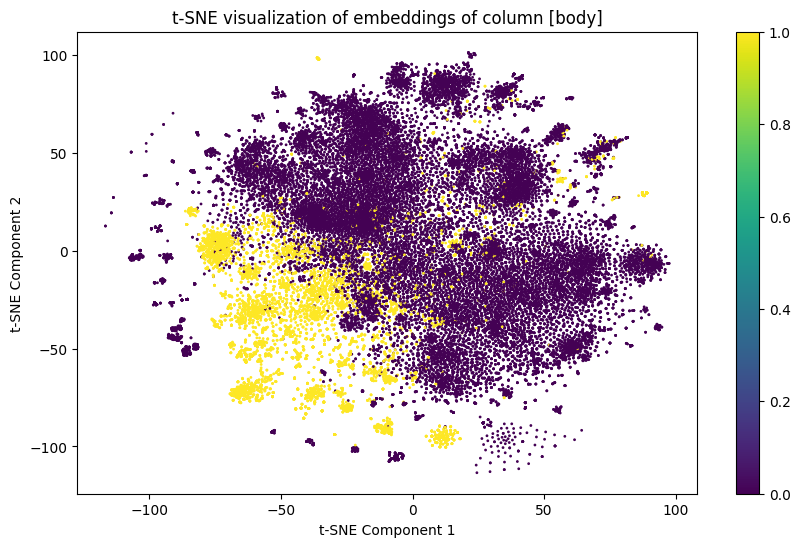

In [ ]:
body_copy = embedding_body.copy()
label_copy = dataset_1['label']

# Run t-SNE
tsne_technique = TSNE(n_components=2, random_state=seed_0)
body_2d = tsne_technique.fit_transform(body_copy)

plt.figure(figsize=(10, 6))
plt.scatter(body_2d[:, 0], body_2d[:, 1], c=label_copy, cmap='viridis', s=1)
plt.title("t-SNE visualization of embeddings of column [body]")
plt.colorbar()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### Section 3.2: Method 2

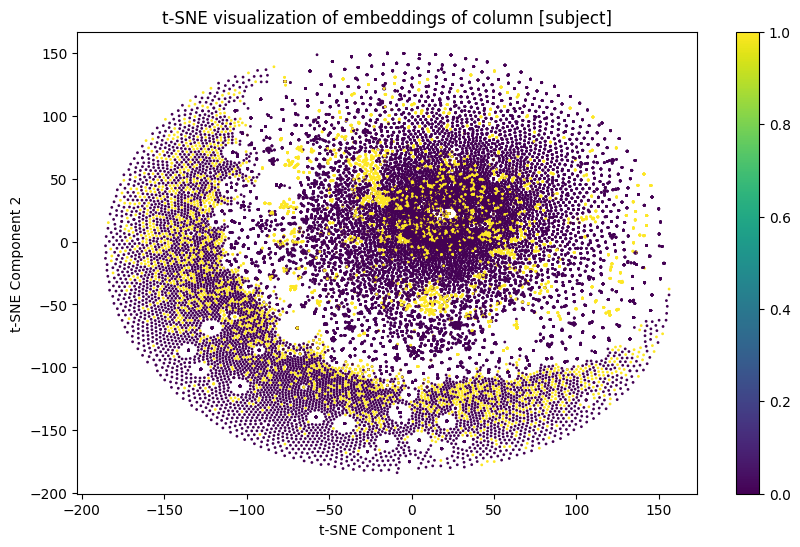

In [ ]:
subject_copy_2 = X_tfidf_subject.copy()
subject_copy_3 = subject_copy_2.toarray()
label_copy = dataset_2['label']

# Run t-SNE
tsne_technique = TSNE(n_components=2, random_state=seed_0)
subject_2d = tsne_technique.fit_transform(subject_copy_3)

plt.figure(figsize=(10, 6))
plt.scatter(subject_2d[:, 0], subject_2d[:, 1], c=label_copy, cmap='viridis', s=1)
plt.title("t-SNE visualization of embeddings of column [subject]")
plt.colorbar()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [ ]:
body_copy = embedding_body.copy()
label_copy = dataset_1['label']

# Run t-SNE
tsne_technique = TSNE(n_components=2, random_state=seed_0)
body_2d = tsne_technique.fit_transform(body_copy)

plt.figure(figsize=(10, 6))
plt.scatter(body_2d[:, 0], body_2d[:, 1], c=label_copy, cmap='viridis', s=1)
plt.title("t-SNE visualization of embeddings of column [body]")
plt.colorbar()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()